In [ ]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Installing tensorflowjs for later use
!pip install tensorflowjs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 90.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 97.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 107.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 117.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 103.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 96.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 81.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 39.5 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
  

In [ ]:
# Importing all necessary library
import os
import pathlib
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential

In [ ]:
#walk through the directory and list the numbers of files
for dirpath, dirnames, filenames in os.walk("/content/drive/MyDrive/Bangkit 2024/Capstone Project/Dataset"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 1 images in /content/drive/MyDrive/Bangkit 2024/Capstone Project/Dataset
There are 4 directories and 0 images in /content/drive/MyDrive/Bangkit 2024/Capstone Project/Dataset/train
There are 0 directories and 300 images in /content/drive/MyDrive/Bangkit 2024/Capstone Project/Dataset/train/Green
There are 0 directories and 300 images in /content/drive/MyDrive/Bangkit 2024/Capstone Project/Dataset/train/Dark
There are 0 directories and 300 images in /content/drive/MyDrive/Bangkit 2024/Capstone Project/Dataset/train/Medium
There are 0 directories and 300 images in /content/drive/MyDrive/Bangkit 2024/Capstone Project/Dataset/train/Light
There are 4 directories and 0 images in /content/drive/MyDrive/Bangkit 2024/Capstone Project/Dataset/test
There are 0 directories and 100 images in /content/drive/MyDrive/Bangkit 2024/Capstone Project/Dataset/test/Medium
There are 0 directories and 100 images in /content/drive/MyDrive/Bangkit 2024/Capstone Project/Dataset/test/Gre

In [ ]:
# Checking number of classes in the training dataset
num_of_coffee_bean_classes = len(os.listdir("/content/drive/MyDrive/Bangkit 2024/Capstone Project/Dataset/train"))
num_of_coffee_bean_classes

4

In [ ]:
# Creating a list of class names from subdirectory
data_dir = pathlib.Path("/content/drive/MyDrive/Bangkit 2024/Capstone Project/Dataset/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['Dark' 'Green' 'Light' 'Medium']


In [ ]:
def view_random_image(target_dir, target_class):
  # Setting up the image directory
  target_folder = target_dir + target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read image and plotting it
  img = mpimg.imread(target_folder + "/" + random_image[0] )
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  # Getting the image shape
  print(f"Image shape: {img.shape}")

  return img

Image shape: (224, 224, 3)


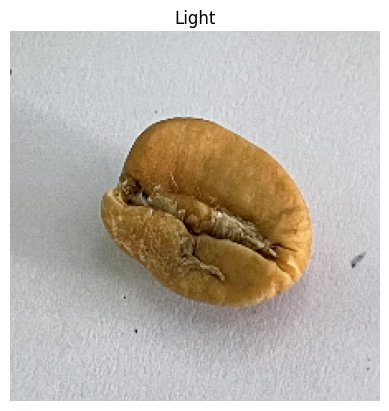

In [ ]:
# Plotting a random image with spesific class
img = view_random_image(
    target_dir = "/content/drive/MyDrive/Bangkit 2024/Capstone Project/Dataset/train/",
    target_class = "Light"
)

In [ ]:
# Checking the width, height, and colour of the image
img.shape

(224, 224, 3)

Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)


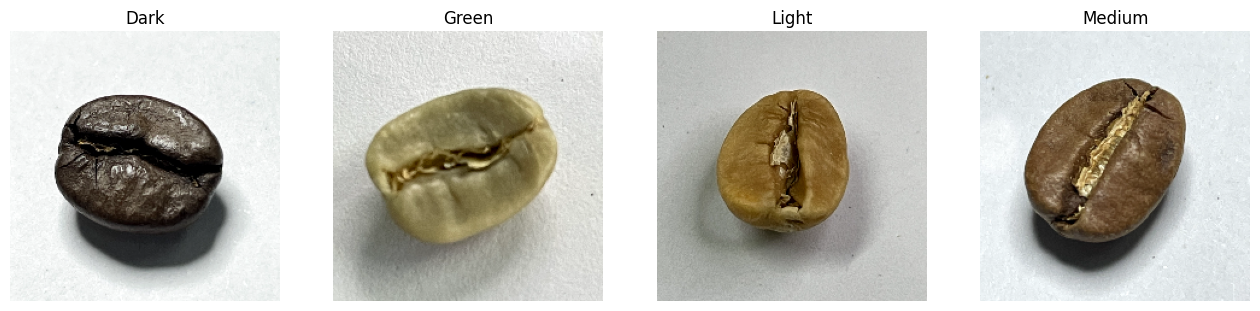

In [ ]:
# Plotting each class of coffee bean
plt.figure(figsize = (16,8))
plt.subplot(1,4,1)
dark_bean_image = view_random_image("/content/drive/MyDrive/Bangkit 2024/Capstone Project/Dataset/train/", "Dark")
plt.subplot(1,4,2)
green_bean_image = view_random_image("/content/drive/MyDrive/Bangkit 2024/Capstone Project/Dataset/train/", "Green")
plt.subplot(1,4,3)
light_bean_image = view_random_image("/content/drive/MyDrive/Bangkit 2024/Capstone Project/Dataset/train/", "Light")
plt.subplot(1,4,4)
medium_bean_image = view_random_image("/content/drive/MyDrive/Bangkit 2024/Capstone Project/Dataset/train/", "Medium")

In [ ]:
# Creating directory for training and testing
train_dir = "/content/drive/MyDrive/Bangkit 2024/Capstone Project/Dataset/train"
test_dir = "/content/drive/MyDrive/Bangkit 2024/Capstone Project/Dataset/test"

In [ ]:
# Rescaling the image and applying image segmentation for training data
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

# Rescaling the image for testing data
test_datagen = ImageDataGenerator(rescale = 1./255)

# Training data transfer from directories to batches
train_generator = train_datagen.flow_from_directory(
    directory = train_dir,
    batch_size = 32,
    target_size = (224, 224),
    class_mode = "categorical"
)

# Testing data transfer from directories to batches
test_generator = test_datagen.flow_from_directory(
    directory = test_dir,
    batch_size = 32,
    target_size = (224, 224),
    class_mode = "categorical"
)

Found 1200 images belonging to 4 classes.
Found 400 images belonging to 4 classes.


In [ ]:
# Create inputs into models
inputs = tf.keras.layers.Input(shape =(224,224,3), name = "input-layer")

# Rescaling
x = tf.keras.layers.experimental.preprocessing.Rescaling(1/255.)(inputs)

# Creating first hidden layer with relu activation function
Z1 = tf.keras.layers.Conv2D(filters = 64 , kernel_size= (3,3), strides = (1,1), padding = 'same')(x)
A1 = tf.keras.layers.ReLU()(Z1)
P1 = tf.keras.layers.MaxPool2D(pool_size = (8,8), strides = (4, 4), padding = 'same')(A1)

# Creating second hidden layer with relu activation function
Z2 = tf.keras.layers.Conv2D(filters = 64 , kernel_size = (3,3), strides = (1,1), padding = 'same')(P1)
A2 = tf.keras.layers.ReLU()(Z2)
P2 = tf.keras.layers.MaxPool2D(pool_size = (8,8), strides = (4, 4), padding = 'same')(A2)

# Creating third hidden layer with relu activation function
Z3 = tf.keras.layers.Conv2D(filters = 64 , kernel_size = (3,3), strides = (1,1), padding = 'same')(P2)
A3 = tf.keras.layers.ReLU()(Z3)
P3 = tf.keras.layers.MaxPool2D(pool_size = (8,8), strides = (4, 4), padding = 'same')(A3)

# Creating flatten layers
F = tf.keras.layers.Flatten()(P3)

# Creating output with dense layer with 4 units since there are 4 classes, with softmax activation function
outputs = tf.keras.layers.Dense(units = 4, activation='softmax')(F)

# Combine the inputs with outputs into a model
model_1 = tf.keras.Model(inputs, outputs)

# Compile the model
model_1.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = ["accuracy"])

In [ ]:
# Creating callbacks for stopping the training when reach the desired accuracy
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs = {}):
            if (logs.get('accuracy') > 0.97) and (logs.get('val_accuracy') > 0.97):
                print("\nTraining is finished! Training and Validation Accuracy has reached above 97%!")
                self.model.stop_training = True

callbacks = myCallback()

In [ ]:
# Fitting the model with 100 epochs
history = model_1.fit(
    train_generator,
    epochs = 100,
    validation_data = test_generator,
    callbacks = [callbacks]
)

Epoch 1/100
38/38 [==============================] - 23s 570ms/step - loss: 1.3869 - accuracy: 0.2292 - val_loss: 1.3860 - val_accuracy: 0.2500
Epoch 2/100
38/38 [==============================] - 22s 582ms/step - loss: 1.3864 - accuracy: 0.2342 - val_loss: 1.3860 - val_accuracy: 0.3854
Epoch 3/100
38/38 [==============================] - 23s 598ms/step - loss: 1.3853 - accuracy: 0.2858 - val_loss: 1.3838 - val_accuracy: 0.2396
Epoch 4/100
38/38 [==============================] - 22s 577ms/step - loss: 1.3601 - accuracy: 0.2517 - val_loss: 1.3034 - val_accuracy: 0.2292
Epoch 5/100
38/38 [==============================] - 23s 601ms/step - loss: 1.2400 - accuracy: 0.4000 - val_loss: 1.0264 - val_accuracy: 0.5729
Epoch 6/100
38/38 [==============================] - 21s 554ms/step - loss: 0.9499 - accuracy: 0.5892 - val_loss: 0.8519 - val_accuracy: 0.5833
Epoch 7/100
38/38 [==============================] - 23s 596ms/step - loss: 0.8418 - accuracy: 0.5800 - val_loss: 0.6858 - val_accuracy:

In [ ]:
# View the summary of the model
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input-layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 224, 224, 64)      1792      
                                                                 
 re_lu_3 (ReLU)              (None, 224, 224, 64)      0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 56, 56, 64)        36928     
                                                           

In [ ]:
# Evaluating the model
model_1.evaluate(test_generator)

13/13 [==============================] - 2s 165ms/step - loss: 0.0566 - accuracy: 0.9850


[0.05661734193563461, 0.9850000143051147]

In [ ]:
# Creating a plot loss for training and validation
def plot_loss_curves(history):

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # Plotting the loss for training and validation
  plt.plot(epochs, loss, label = "training_loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plotting the accuracy for training and validation
  plt.figure()
  plt.plot(epochs, accuracy, label = "training_accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

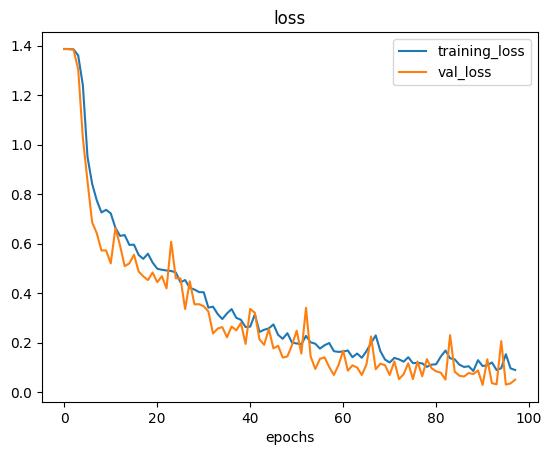

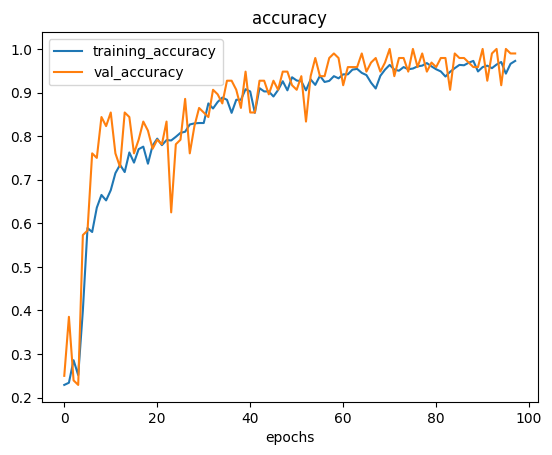

In [ ]:
# Plot the loss and accuracy from the model training above
plot_loss_curves(history)

In [ ]:
def load_and_prep_image(filename, img_shape = 224):
  # Reading the image
  img = tf.io.read_file(filename)

  # Decoding the image to a tensor
  img = tf.image.decode_image(img)

  # Resizing the image
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescaling the image
  img = img/255.
  return img

In [ ]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 67ms/step


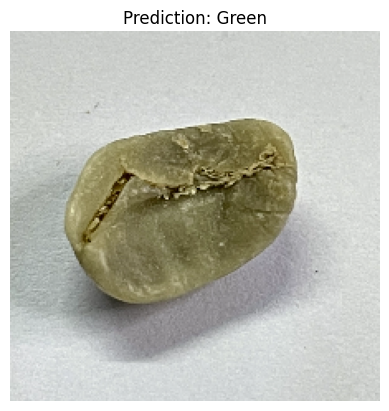

In [ ]:
pred_and_plot(model_1, "/content/drive/MyDrive/Bangkit 2024/Capstone Project/Dataset/test/Green/green (1).png", class_names)

In [ ]:
# Creating path for saving the model
saved_model_path = "./Model_1.h5"

# Saving the model
model_1.save(saved_model_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
!tensorflowjs_converter --input_format=keras --output_format=tfjs_graph_model /content/drive/MyDrive/Converting/Model_1.h5 /content/drive/MyDrive/Converting/Model_1.h5tfjs_modelv1.0

2024-06-04 04:32:55.121230: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-04 04:32:56.444189: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-06-04 04:33:10.163559: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0
2024-06-04 04:33:10.163867: I tensorflow/core/grappler/clusters/single_machine.cc:361] Starting new session
